# Data pre-processing in Python

The exercise shows basic pre-processing techniques (normalization, one-hot encoding, binarization) using `scikit-learn` and `pandas`.

## Types of variables.

Before we jump into the topic of normalization and standardization, let's talk about different types of variables, which describe attributes of entries in data sets. There are several possible categorizations: 
  * we can classify variables as dependent and independent, for dependent variables, there is a function that can convert one variable into another one, and the function can be either known or unknown $\exists_{f}f(v_1) = v_2$. For independent variables, there is no such function.
  * we can divide variables by their use in a data mining process into target variables and features (source variables) - we assume that there is a function, which is capable of mapping features into target variables. This function has to come from a set of hypothetic, often parametrized functions, which potentially could do the mapping.  This set of functions is called a hypothesis set (or hypothesis class) $f_{\theta} \in H, f(X,\theta) = Y$. Here $X$ is a set of source variables, $Y$ is a set of target variables, $f_\theta$ is a hypothesis, $\theta$ is a set of parameters, and $H$ is a hypothesis set.
  * finally we can divide variables by the type of the values as: continous, discrete or categorical. This distinction is specifically important in context of pre-processing techniques. The normalization, standarization and scaling can only be performed on continous variables. One-hot encoding can only be done for categorical variables. Discrete variables can be interpreted as either continous or categorical. Binarization is a process of converting continous variables into categorical ones.

Let's take a look at variables in sk-learn datasets.
 

In [1]:
from sklearn import datasets, preprocessing
import pandas as pd
import numpy as np
iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(np.concatenate([iris.data,np.array([iris.target]).T],axis=1), columns = iris.feature_names + ['target'])
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Here we can clearly see that all of the features are continous, while the target variable is either discrete or categorical. We need to think how would we interpret it. In this case, each target value indicates one of the types of an iris: 0 - setosa, 1 - versicolor, 2 - virginica. The target variable is a categorical variable. Notice that in this case, `target = 2` is not greater than `target = 1`, or that `target = 1 + target = 1` does not equal `target = 2`. 

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
digits = datasets.load_digits()
digits_dataframe = pd.DataFrame(np.concatenate([digits.data,np.array([digits.target]).T],axis=1), columns = digits.feature_names + ['target'])
digits_dataframe

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In the digits dataset all variables, except the target are discrete. We can interpret them as continous. The target variable is still categorical.

In [4]:
wine = datasets.load_wine()
wine_dataframe = pd.DataFrame(np.concatenate([wine.data,np.array([wine.target]).T],axis=1), columns = wine.feature_names + ['target'])
wine_dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [6]:
diabetes = datasets.load_diabetes()
diabetes_dataframe = pd.DataFrame(np.concatenate([diabetes.data,np.array([diabetes.target]).T],axis=1), columns = diabetes.feature_names + ['target'])
diabetes_dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


The diabetes dataset is similar to the previous ones, however the target variable should be interpreted as discrete or continous, it's not a categorical variable.

In [7]:
linnerud = datasets.load_linnerud()
linnerud_dataframe = pd.DataFrame(np.concatenate([linnerud.data,linnerud.target],axis=1), columns = linnerud.feature_names + linnerud.target_names)
linnerud_dataframe

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In the Linnerud dataset all of the variables, including three target variables, are discrete and can be interpreted as continous.


## Why and when should the data be normalized?

When dealing with raw measurement data, very often the values of each attribute will come in different ranges. For example the speed of a car (in km/h) is going to be within $0-10^{3}$ range, while the volume of an engine (in cc) is going to be within $10^2-10^4$ range. We do not want the range of an attribute to impact the algorithm we use. Why should we normalize data? At the begninng of our journey with data mining we just assume that we should normalize. We just get better and more consistent results when we normalize. 

## Normalization techniques

Let's take a look at the description of attributes in the wine dataset. Here we can see that values of features are in various ranges.

In [7]:
wine_dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


We will use the `apply()` function to define *ad hoc* functions applied to elements of a given Series.

In [8]:
wine_dataframe['alcohol'].apply(lambda x: x/10 + 100)

0      101.423
1      101.320
2      101.316
3      101.437
4      101.324
        ...   
173    101.371
174    101.340
175    101.327
176    101.317
177    101.413
Name: alcohol, Length: 178, dtype: float64

Drawing can be easily done using [MatPlot](https://matplotlib.org), a handy library for simple data visualization.

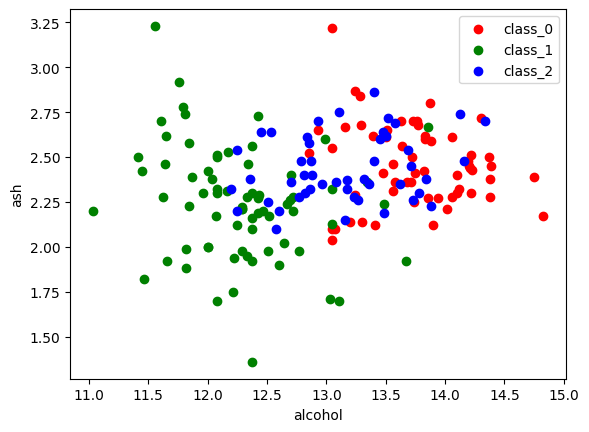

In [8]:
from matplotlib import pyplot as plt
plt.xlabel('alcohol')
plt.ylabel('ash')
plt.scatter(wine_dataframe[wine_dataframe.target == 0]['alcohol'][:], wine_dataframe[wine_dataframe.target == 0]['ash'][:], c='red', label='class_0')
plt.scatter(wine_dataframe[wine_dataframe.target == 1]['alcohol'][:], wine_dataframe[wine_dataframe.target == 1]['ash'][:], c='green', label='class_1')
plt.scatter(wine_dataframe[wine_dataframe.target == 2]['alcohol'][:], wine_dataframe[wine_dataframe.target == 2]['ash'][:], c='blue', label='class_2')
plt.legend()
plt.show()

A similar effect can be obtained by calling directly the `plot()` method of a `pandas.Series`.

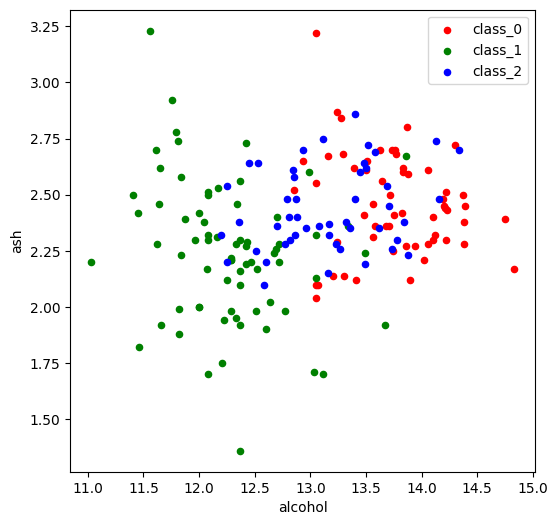

In [9]:
_, ax = plt.subplots(figsize=(6, 6))
colors = {0:'red',1:'green',2:'blue'}
for key, group in wine_dataframe.groupby('target'):
  group[['alcohol','ash']].plot(ax=ax,kind='scatter', x=0, y=1, c = colors[key] , label=wine.target_names[int(key)])
plt.show()

## Min-max Normalization

The first operation is the linear normalization performed by the [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) class. This class performs the following transformation of an attribute:

$$v' = \frac{v-min}{max-min} \cdot (max'-min') + min'$$

where $max,min$ are the original max,min values of the attribute, $max',min'$ are the max,min values in the new scale, 
$v'$ is the new value of the attribute, and $v$ is the original value of the attribute. Notice that this type of normalization just ensures that values are within the same range, and that's it. It doesn't work well with outliers, it doesn't do anything to a sum of all features for each sample (so it wouldn't be a good idea to use minmax scaler if for example we are trying to normalize an occurence vector for a full-text document, as the feature values would be dependent on the length of a document).

We already know that the target variable for the wine dataset is categorical, we shouldn't normalize it. Since we are only transforming features (and not the target variables), in the first step we will save these feature columns (and their names) to new dataframe.

In [11]:
X = wine_dataframe.iloc[:,:-1]
cols = wine_dataframe.columns[:-1]
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


The following example shows how to normalize the entire table using the Min-Max normalization.

In [12]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range=(0,1)).fit(X)
X_minmax = pd.DataFrame(norm.transform(X), columns=cols)

X_minmax

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [13]:
X_minmax.describe().round(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,0.519,0.315,0.538,0.459,0.323,0.453,0.356,0.437,0.373,0.322,0.388,0.491,0.334
std,0.214,0.221,0.147,0.172,0.155,0.216,0.211,0.235,0.181,0.198,0.186,0.260,0.225
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.351,0.170,0.455,0.340,0.196,0.263,0.182,0.264,0.265,0.166,0.246,0.245,0.159
50%,0.532,0.222,0.535,0.459,0.304,0.474,0.379,0.396,0.361,0.291,0.394,0.553,0.282
75%,0.697,0.463,0.640,0.562,0.402,0.628,0.535,0.580,0.486,0.420,0.520,0.696,0.504
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


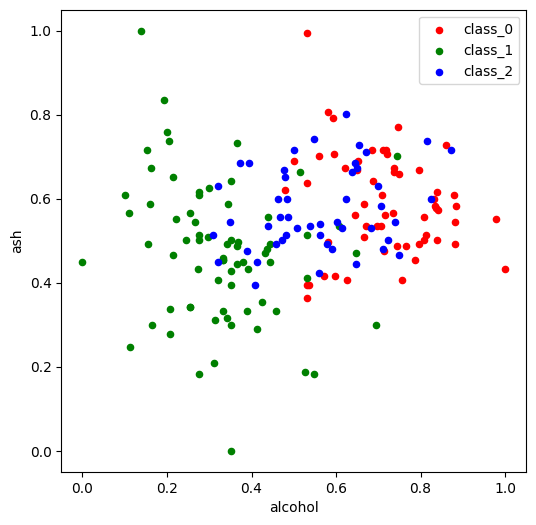

In [14]:
_, ax = plt.subplots(figsize=(6, 6))
colors = {0:'red',1:'green',2:'blue'}
X_minmax['target'] = wine_dataframe['target']
for key, group in X_minmax.groupby('target'):
  group[['alcohol','ash']].plot(ax=ax,kind='scatter', x=0, y=1, c = colors[key] , label=wine.target_names[int(key)])
plt.show()

 ## Excercise / Homework:

Use pandas apply function to implement your own version of the min-max scaling.

In [15]:
def normalize(df, x, col):
  mini = df[col].min()
  maxi = df[col].max()
  return (x - mini)/(maxi-mini)

X2 = pd.DataFrame(columns = X.columns)
for column in X.columns:
  X2[column] = X[column].apply(lambda x: normalize(X,x,column))
X2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


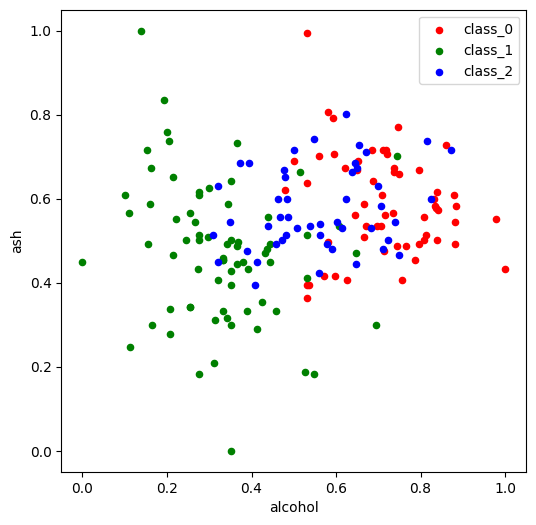

In [16]:
_, ax = plt.subplots(figsize=(6, 6))
colors = {0:'red',1:'green',2:'blue'}
X2['target'] = wine_dataframe['target']
for key, group in X2.groupby('target'):
  group[['alcohol','ash']].plot(ax=ax,kind='scatter', x=0, y=1, c = colors[key] , label=wine.target_names[int(key)])
plt.show()

## Standarization

Another type of feature normalization is standarization, where the standardized feature has the mean value of 0 and the standard deviation of 1. In the `scikit-learn` library this operation can be achieved using the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) class which performs the following transformation:

$$v' = \frac{v-\mu}{\sigma}$$

where $\mu$ is the mean value of the feature, and $\sigma$ is its standard deviation. Notice that standarization doesn't ensure that variables are within similar ranges, but it works well with outliers. 

In [17]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scale.transform(X), columns=cols)

X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [18]:
X_scaled.describe().round(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971


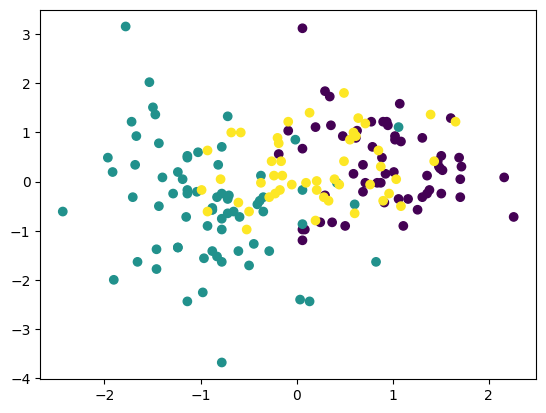

In [19]:
x = X_scaled['alcohol'][:]
y = X_scaled['ash'][:]
t = wine_dataframe['target']

plt.scatter(x, y, c=t)
plt.show()

 ## Excercise / Homework:

Use pandas apply function to implement your own version of the standardization.

In [20]:
def standarize(df, x, col):
  mu = df[col].mean()
  sig = df[col].std()
  return (x - mu)/sig

X2 = pd.DataFrame(columns = X.columns)
for column in X.columns:
  X2[column] = X[column].apply(lambda x: standarize(X,x,column))
X2.describe().round(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.427,-1.429,-3.669,-2.664,-2.082,-2.101,-1.691,-1.863,-2.063,-1.630,-2.089,-1.890,-1.489
25%,-0.786,-0.657,-0.571,-0.687,-0.822,-0.883,-0.825,-0.738,-0.596,-0.793,-0.765,-0.950,-0.782
50%,0.061,-0.422,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.237,-0.233
75%,0.834,0.668,0.696,0.600,0.508,0.807,0.847,0.608,0.627,0.493,0.711,0.786,0.756
max,2.253,3.100,3.147,3.146,4.359,2.532,3.054,2.396,3.475,3.426,3.292,1.955,2.963


## L-1 and L-2 normalization

The L-k normalizations use a norm given by 

$$||v||_k = \left( \sum_{i=1}^{n}|v_i|^k\right)^{\frac{1}{k}} $$

New values, after the normalization are given by:

$$x' = \frac{x}{||x||_{k}}$$

In practice only the L-1 and L-2 normalization schemes are used. Notice that regardless of the k, this normalization always preserves the proportions of the original data. 

## Homework/exercise

Look up the docs for the [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) class which performs the normalization of individual instances of the training set. Normalize the *Iris* dataset and observe, what happens when you modify the values of the `norm` argument of class constructor.

*hint* : use the [DataFrame.sum()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) method.

In [21]:
def Lk_normalize(df, x, col, k):
    df[col] = df[col]**k
    summ = df[col].sum()
    return x/summ**(1/k)

X3 = iris_dataframe
for col in X3.columns:
    X3[col] = X3[col].apply(lambda x: Lk_normalize(X3,x,col,2))
X3.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.0
mean,0.000546,0.000797,0.000220,0.000126,0.0
std,0.005826,0.007808,0.002289,0.001061,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.0
max,0.070563,0.092542,0.027548,0.011502,0.0


## Discretization 

Sometimes we want to convert a continous variable into a discrete one. An alternative to manual binning of numerical attributes (since `scikit-learn` does not provide explicit classes to complete this task) is to use automatic range detection using the  [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) class. This class divides the attribute into *k* ranges in such way that the distances between geometrical means of bins are maximized.

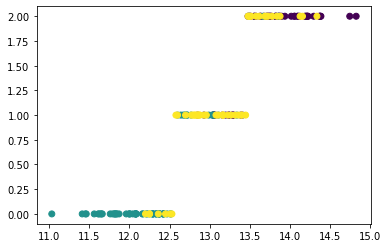

In [ ]:
kbin = preprocessing.KBinsDiscretizer(n_bins=3, strategy='kmeans', encode='ordinal').fit(wine_dataframe[['alcohol']])

df_kbinned = pd.DataFrame(kbin.transform(wine_dataframe[['alcohol']]))

x = wine_dataframe['alcohol'][:]
y = df_kbinned[:]
t = wine_dataframe['target']

plt.scatter(x, y, c=t)
plt.show()

 ## Homework/exercise

 Use the discretization process described above for the target value of the diabetes dataset. Create a new dataframe for the dataset, which uses the newly created target.

## Binarization

Sometimes a feature must be tranformed into a binary flag which denotes the result of a logical test conducted on the values of the feature. This can be easily done using the [Binarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) class.

In [22]:
binarize = preprocessing.Binarizer(threshold=13.5).fit(X)

X_binned = pd.DataFrame(binarize.transform(X), columns=cols)

pd.concat([wine_dataframe.alcohol,X_binned.alcohol], axis=1).head(50)

,alcohol,alcohol
0,14.23,1.0
1,13.20,0.0
2,13.16,0.0
3,14.37,1.0
4,13.24,0.0
5,14.20,1.0
6,14.39,1.0
7,14.06,1.0
8,14.83,1.0
9,13.86,1.0


## Homework / Excercise

Binarize values of pixels in the digits dataset. Use the min-max scaling prior to the binarization process. Use the describe method to figure out the treshold.

<Figure size 2304x2304 with 0 Axes>

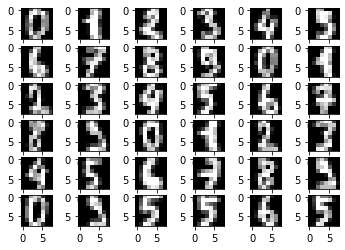

In [45]:
data = digits.data
plt.figure(figsize=(32,32))
no_images = 36
data = np.reshape(data, (-1,8,8))
_, ax = plt.subplots(int(np.sqrt(no_images)),int(np.sqrt(no_images)))
for i in range(no_images):
  ax[int(i/int(np.sqrt(no_images))),i%int(np.sqrt(no_images))].imshow(data[i], cmap = 'gray')
plt.show()

In [64]:
#code goes here
X_binned = None #and here

<Figure size 2304x2304 with 0 Axes>

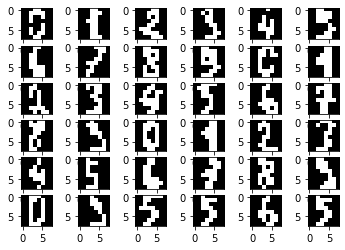

In [65]:
data = X_binned.to_numpy()
plt.figure(figsize=(32,32))
no_images = 36
data = np.reshape(data, (-1,8,8))
_, ax = plt.subplots(int(np.sqrt(no_images)),int(np.sqrt(no_images)))
for i in range(no_images):
  ax[int(i/int(np.sqrt(no_images))),i%int(np.sqrt(no_images))].imshow(data[i], cmap = 'gray')
plt.show()

## Displaying histograms

Simple counting of values in a feature can be done using:

- `pandas.Series.value_counts()`
- `collections.Counter`

and to plot the histogram the easiest way is to use `pandas.Series.hist()`

In [ ]:
X_binned['alcohol'].value_counts()

1.0    92
0.0    86
Name: alcohol, dtype: int64

In [ ]:
from collections import Counter

Counter(X_binned['alcohol'].values)

Counter({1.0: 92, 0.0: 86})

<Axes: >

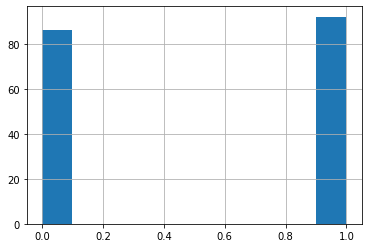

In [ ]:
X_binned['alcohol'].hist()

## Imputation of missing values

Missing values can significantly distort the results of the analysis. Many learning algorithms do not accept input data which contains missing data. [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) allows to change missing values to a mean, a median, or a mode, based on the non-missing values of the attribute.

In [ ]:
from sklearn.impute import SimpleImputer

matrix = np.array([[ 1, 2, np.nan], [np.nan, 4, 5], [6, np.nan, 7]])

# alternative strategies are 'mean', 'median' and 'most_frequent'
imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit(matrix)

print(matrix)
print()
print(imp.transform(matrix))

[[ 1.  2. nan]
 [nan  4.  5.]
 [ 6. nan  7.]]

[[1.  2.  6. ]
 [3.5 4.  5. ]
 [6.  3.  7. ]]


## Label encoding

Do you remember that, when it comes to categorical variables $1+1\neq 2$? Sometimes we need to convert the class numbers into entities, on which we can perform algebraic operations. Usually, we use vectors, and the vector for each class is orthogonal to a vector for another class: $v_{c1} \times v_{c2} = 0$. The simpliest implementation of that idea is the one-hot encoding. E.g. given there are 3 classes, class 1 is going to be converted to [1 0 0], class 2 is going to be converted into [0 1 0] and class 3 is converted into [0 0 1]. A very useful python tool to perform the task is the [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) which transforms categorical attributes into a set of binary features using the one-hot encoding. The transformation creates *k* new features, where *k* is the number of distinct values of the transformed attribute.

In [ ]:
df_target = wine_dataframe['target'].values

print(df_target)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [ ]:
one_hot = preprocessing.OneHotEncoder(categories='auto').fit(df_target.reshape(-1,1))

one_hots = one_hot.transform(df_target.reshape(-1,1)).todense()
one_hots[55:65]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [ ]:
one_hot.inverse_transform(np.asarray(one_hots))[55:65]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

 ## Homework/Excercise

 Use the one-hot encoder to convert the target variable of the Iris dataset to the one-hot vectors.